In [119]:
import pandas as pd
from pandas import DataFrame, Series
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import seaborn as sns

In [120]:
input, target = datasets.load_breast_cancer(return_X_y=True, as_frame=True)
#Type cast for IDE Pycharm hints
input: DataFrame = input
target: Series = target

Визначимо за допомогою простої та складної моделі точність передбачень
Проста модель учиться лише на mean radius(середньому радіусі)
Складна учиться на усіх вхідних даних

In [121]:
model_simple = LogisticRegression(random_state=0, max_iter=10000)
model_simple.fit(input[200:][input.columns[:1]], target[200:])
model_simple.score(input[-200:][input.columns[:1]], target[-200:])

0.925

Точність у складної моделі вище. Вона складає 0.99 або 99%.
Тобто маючи дані відповідні дані можна спрогнозувати з 99% чи пухлина є злоякісною чи доброякісною.

In [122]:
model = LogisticRegression(random_state=0, max_iter=10000)
model.fit(input[400:], target[400:])
model.score(input[-100:], target[-100:])

0.99

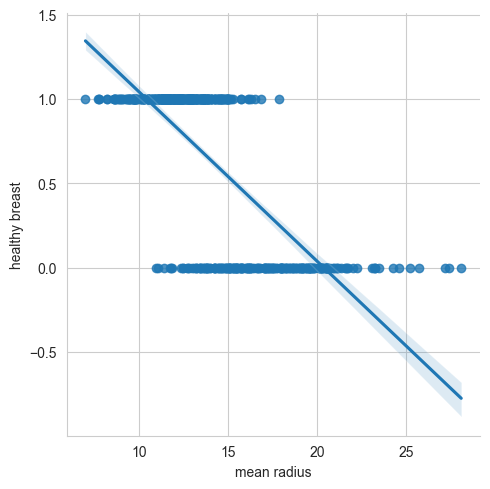

In [123]:
data = input.__copy__()
data['healthy breast'] = target
sns.lmplot(data, x=data.columns[0], y=data.columns[-1]);

Виведемо граф відносно mean radius(середнього радіуса пухлини) та якості пухлини, де
Злоякісне утворення = 0
Доброякісне утворення = 1

<AxesSubplot: xlabel='healthy breast', ylabel='mean radius'>

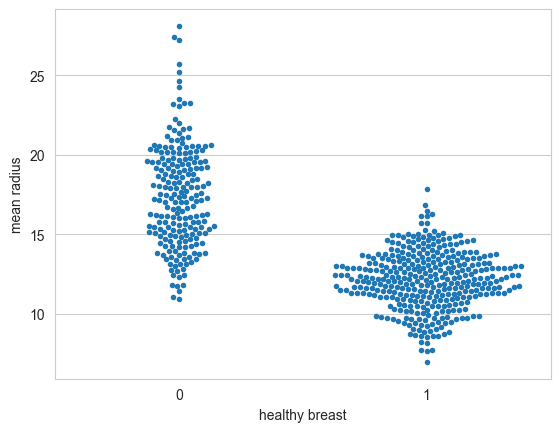

In [128]:
sns.swarmplot(data, x=data.columns[-1] , y=data.columns[0], size=4)

D:\Documents\ML\L1\.venv\lib\site-packages\seaborn\axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


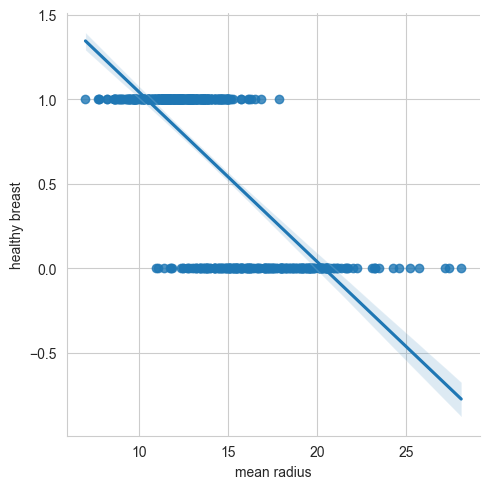

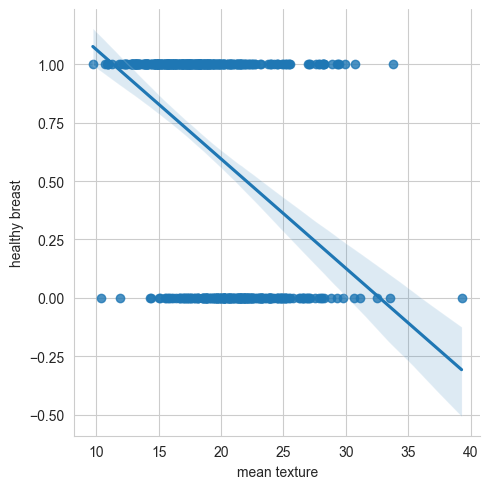

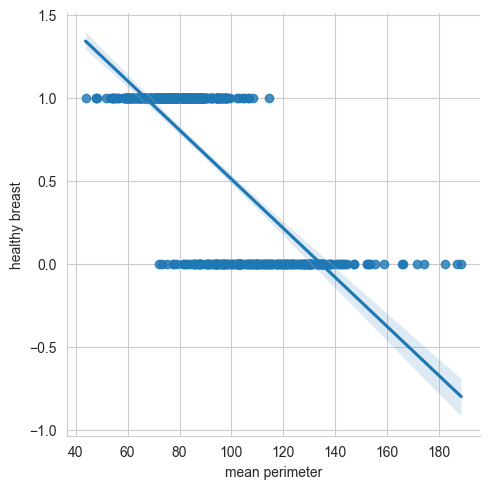

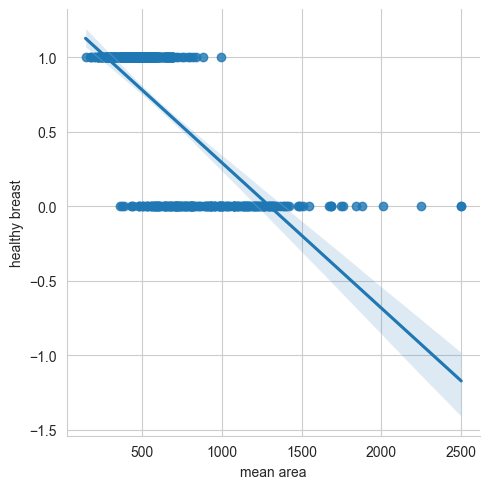

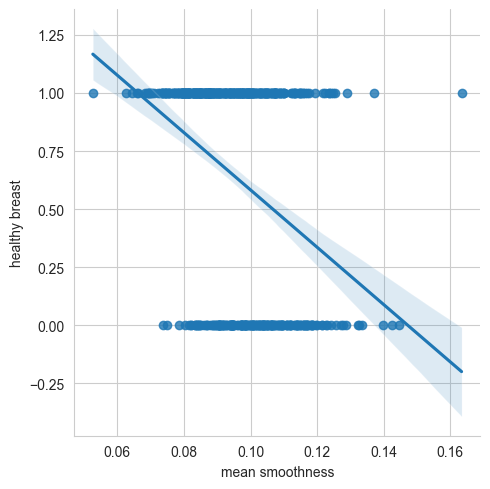

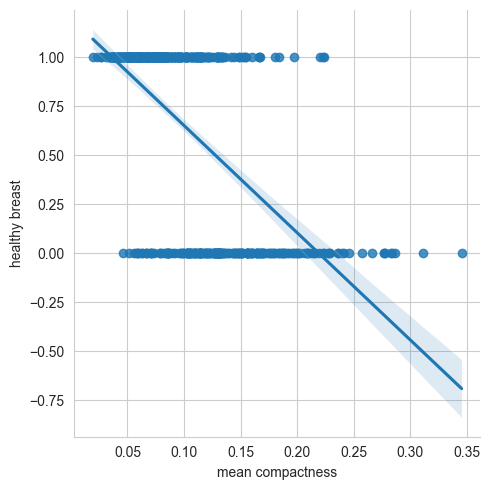

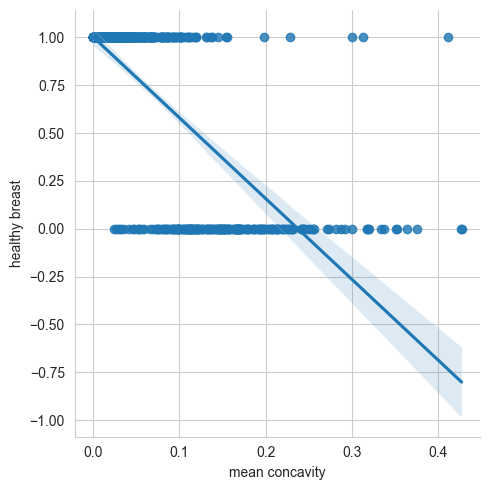

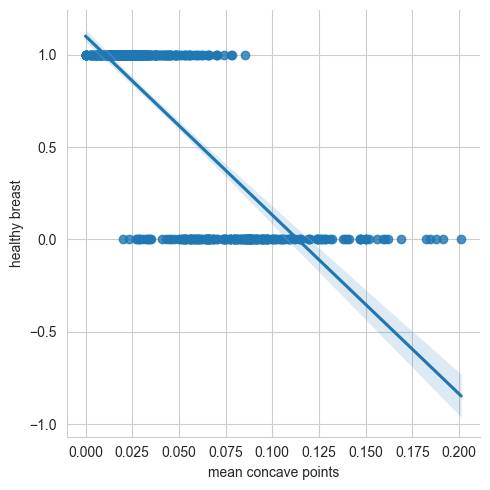

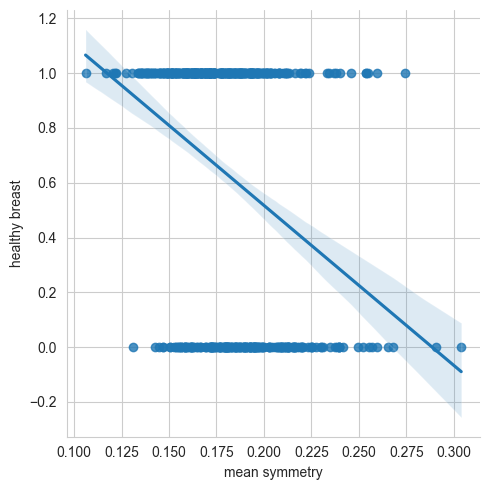

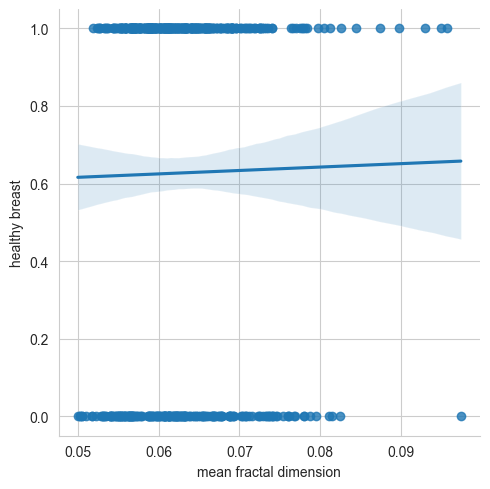

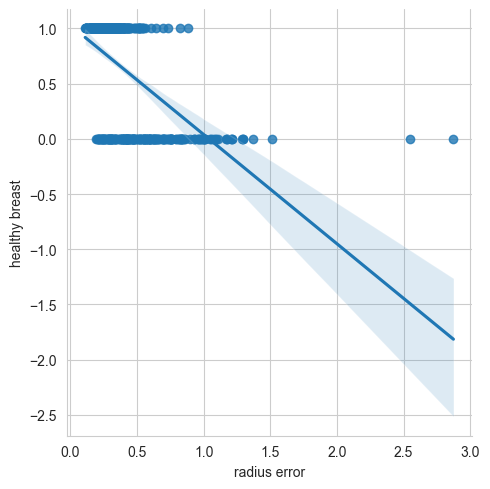

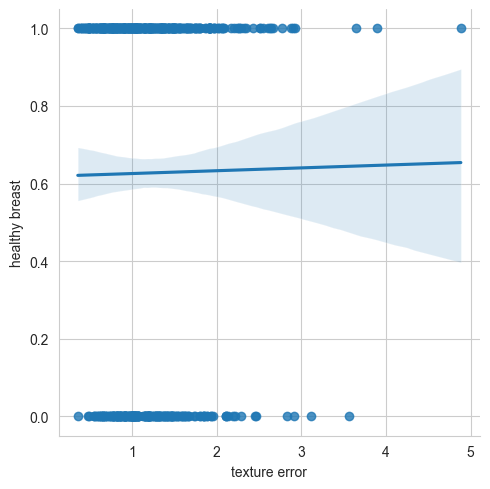

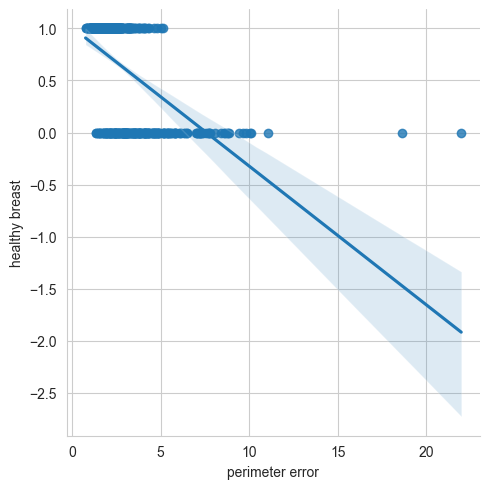

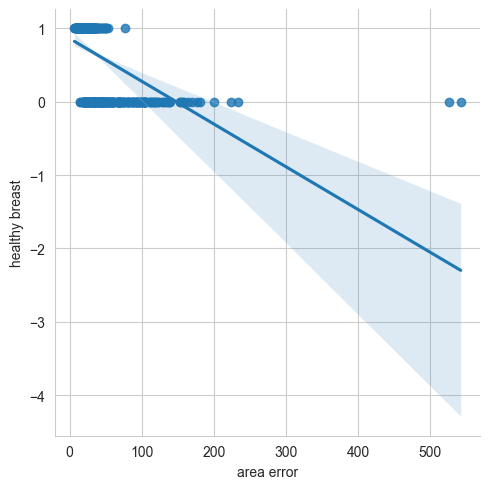

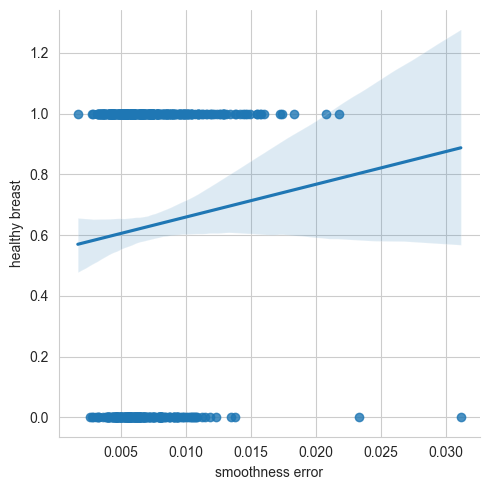

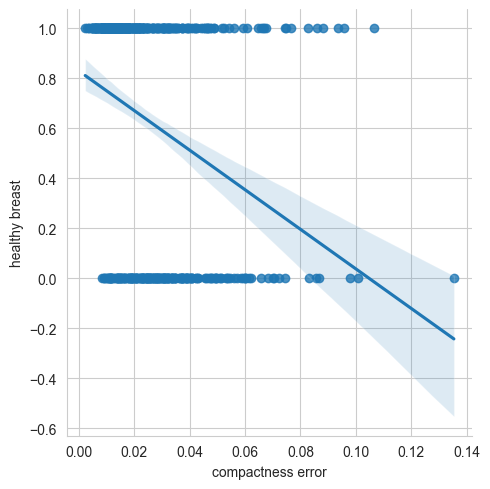

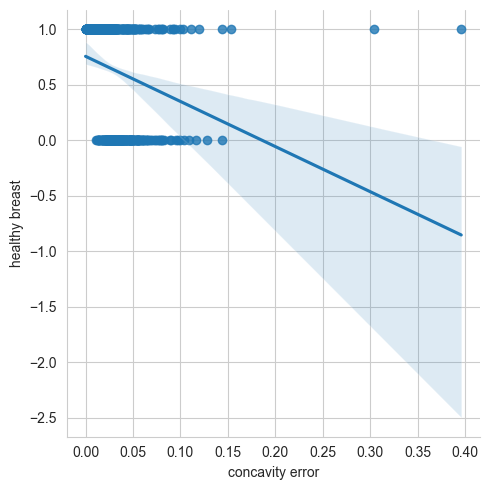

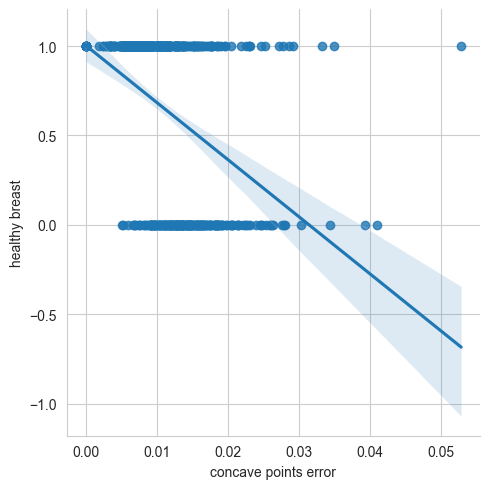

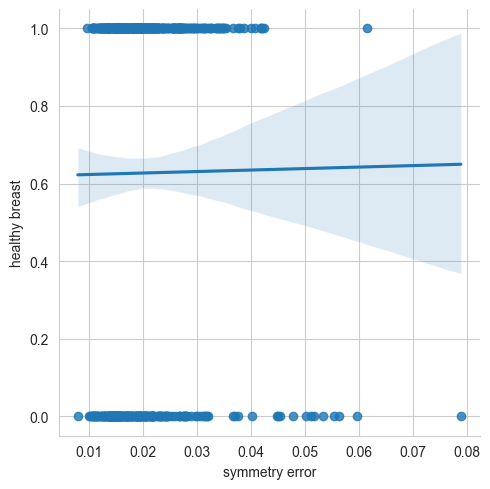

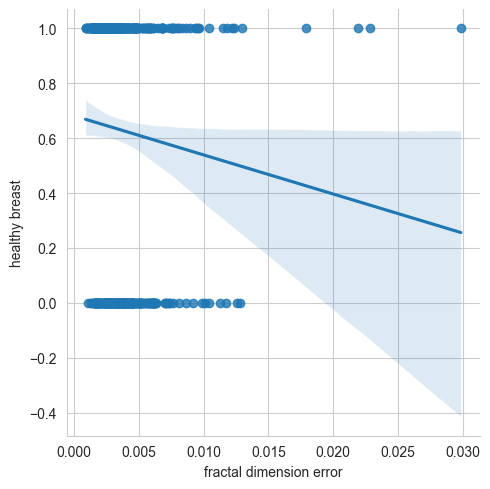

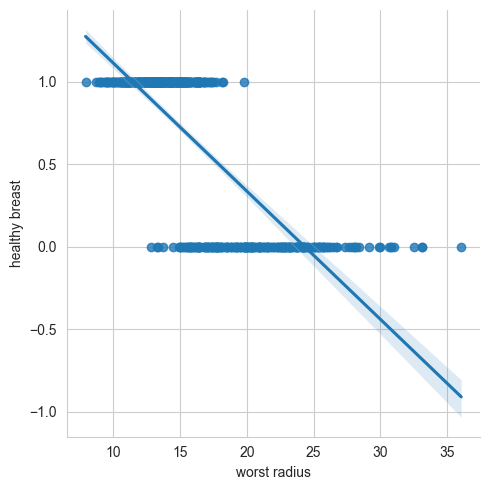

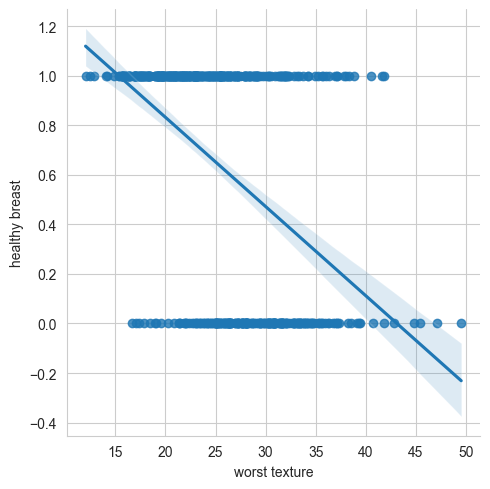

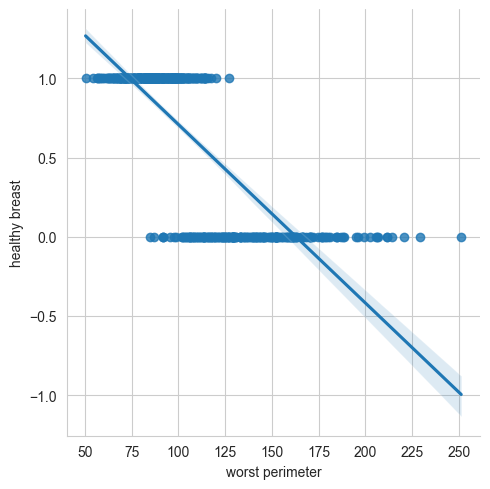

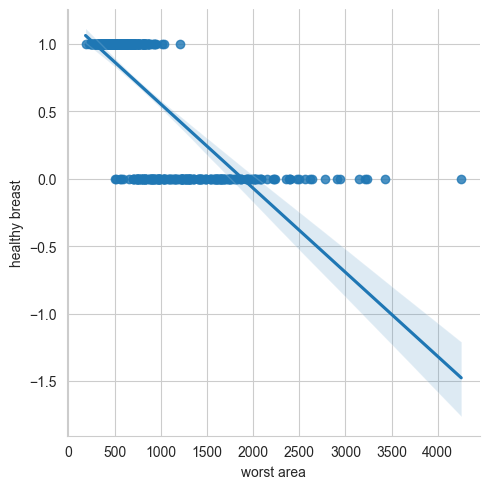

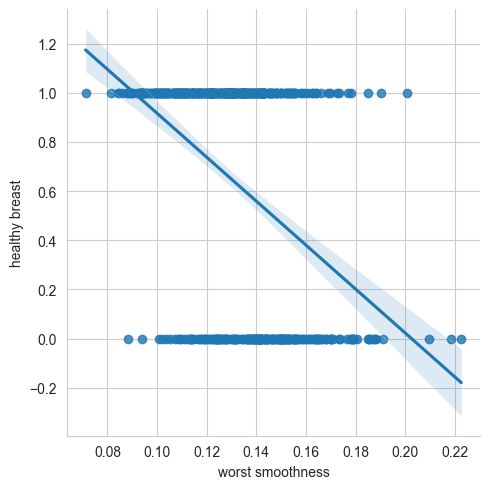

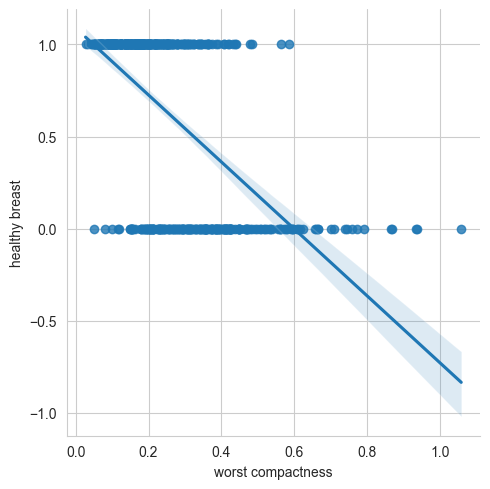

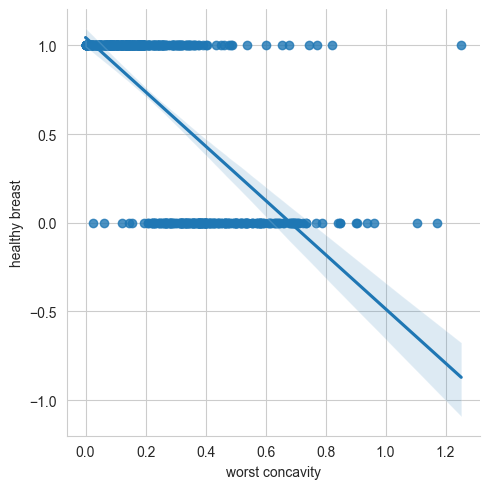

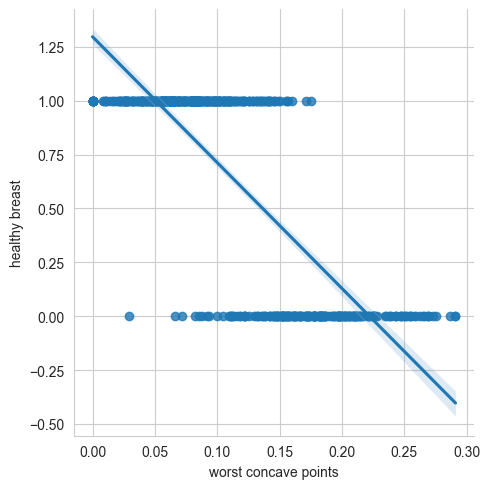

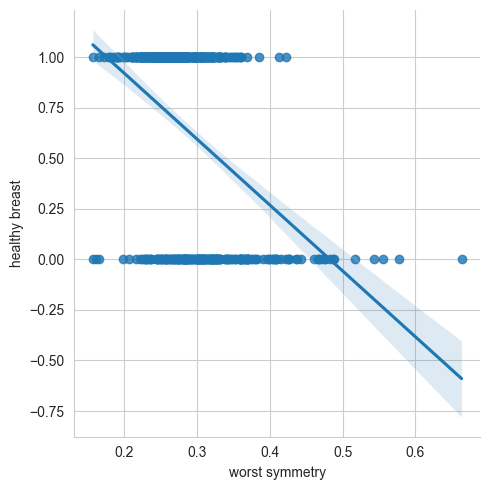

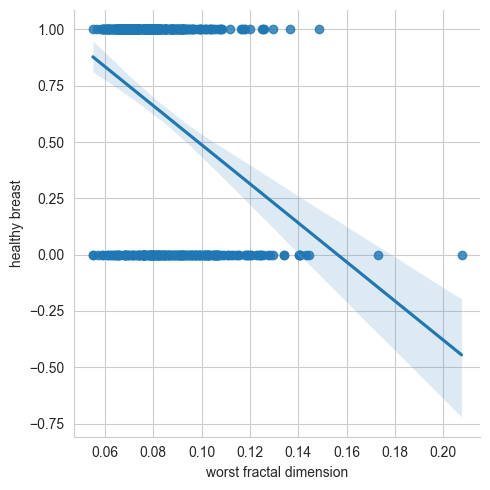

In [125]:
for i in range(len(input.columns)):
    sns.lmplot(data, x=input.columns[i], y=data.columns[-1]);